In [1]:
import os
import pandas as pd
import numpy as np

%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

import sys
sys.path.append('../../../hetnet-ml/src')

import plot_tools as pt

DATA_DIR = '../../data'

In [2]:
base_dir = os.path.join(DATA_DIR, 'time_networks-6_metanode/2020/alpha_0.1/10x_pos-neg/0_year_diff/' + \
                        'recall-scoring/2_pmids/dwpc_w_0.6/5_fold_CV/')

In [3]:
n_folds = 5

In [4]:
seeds = sorted([d for d in os.listdir(base_dir) if d.startswith('seed')])

all_preds = []

for seed in seeds:
    load_dir = os.path.join(base_dir, seed)
    all_preds.append(pd.read_csv(os.path.join(load_dir, 'predictions.csv')))

In [5]:
def plot_seed_roc(dfs, seed, title=None):
    ys = []
    y_preds = []
    for fold in range(n_folds):
        y_true = dfs[seed].query("holdout_fold == @fold")['status'].values
        y_pred = dfs[seed].query("holdout_fold == @fold")['probas_{}'.format(fold)].values
    
        ys.append(y_true)
        y_preds.append(y_pred)
    
        pt.graph_single_roc(y_true, y_pred, 'Fold {}'.format(fold), alpha=.6, lw=2)
    
    pt.graph_mean_roc(ys, y_preds, lw=4)
    if title:
        fig = pt.graph_roc_boilerplate(title)
    else:
        fig = pt.graph_roc_boilerplate('Test set ROCs for seed {}'.format(seed))
    return fig
    
def plot_seed_prc(dfs, seed, title=None):    
    ys = []
    y_preds = []
    for fold in range(n_folds):
        y_true = dfs[seed].query("holdout_fold == @fold")['status'].values
        y_pred = dfs[seed].query("holdout_fold == @fold")['probas_{}'.format(fold)].values

        ys.append(y_true)
        y_preds.append(y_pred)

        pt.graph_single_prc(y_true, y_pred, 'Fold {}'.format(fold), alpha=.6, lw=2)

    pt.graph_mean_prc(ys, y_preds, lw=4)
    
    if title:
        fig = pt.graph_prc_boilerplate(title)
    else:
        fig = pt.graph_prc_boilerplate('Test set Precision Recall Curve for seed {}'.format(seed))
    return fig

    

## Standard 5-fold X-val

In this standard paradigm, the indications list was split into 5 equal pieces, so that the training and holdout indications were of the same number for each fold.  However, a given compound or disease could be in both the the training and testing sets.

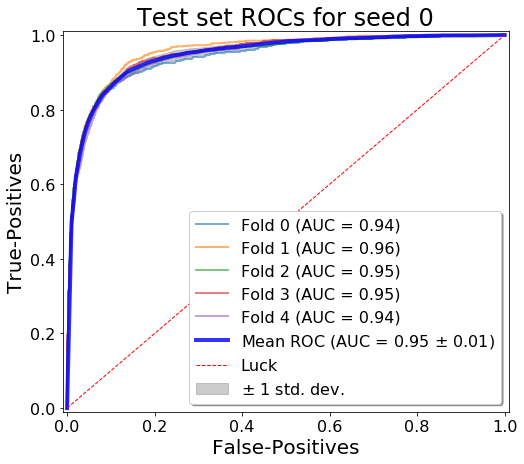

In [6]:
plot_seed_roc(all_preds, 0);

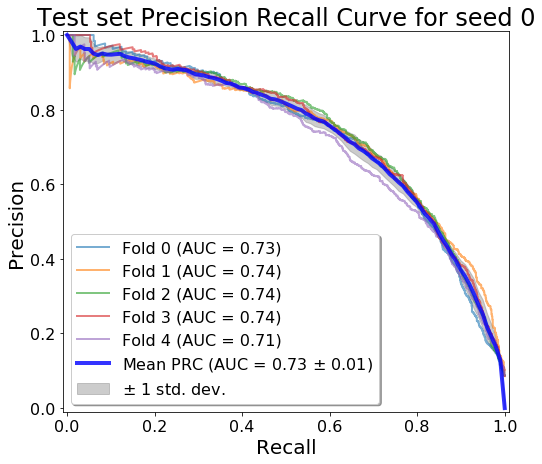

In [7]:
plot_seed_prc(all_preds, 0);

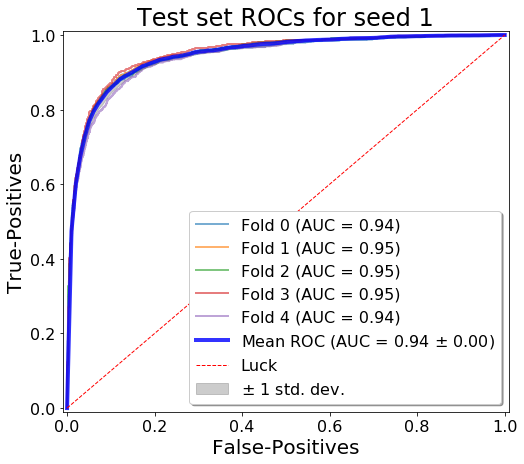

In [8]:
plot_seed_roc(all_preds, 1);

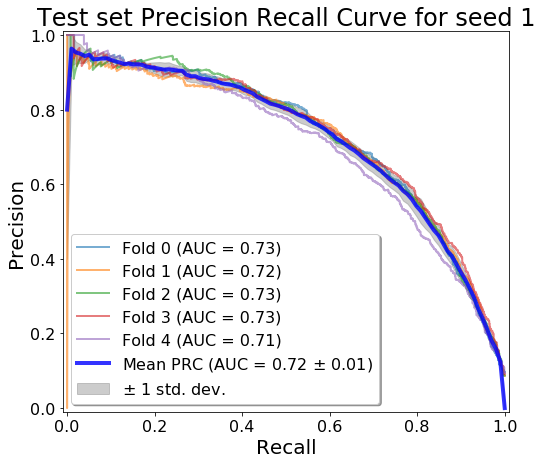

In [9]:
plot_seed_prc(all_preds, 1);

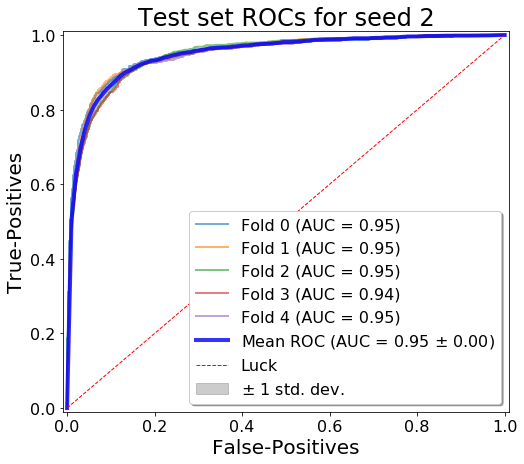

In [10]:
plot_seed_roc(all_preds, 2);

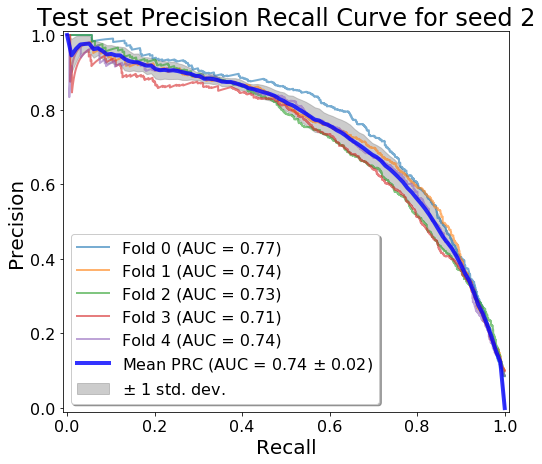

In [11]:
plot_seed_prc(all_preds, 2);

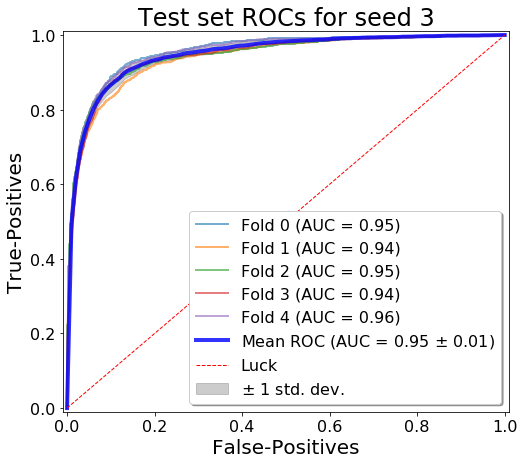

In [12]:
plot_seed_roc(all_preds, 3);

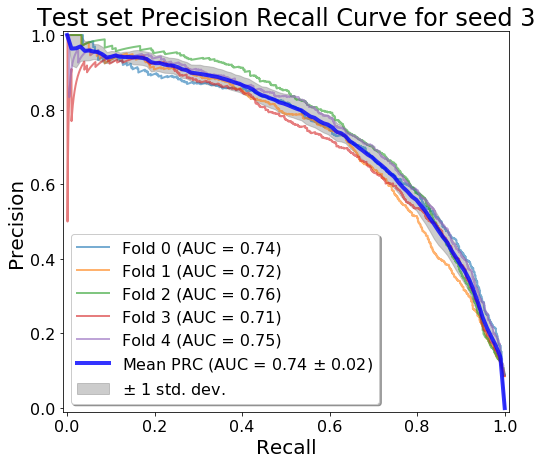

In [13]:
plot_seed_prc(all_preds, 3);

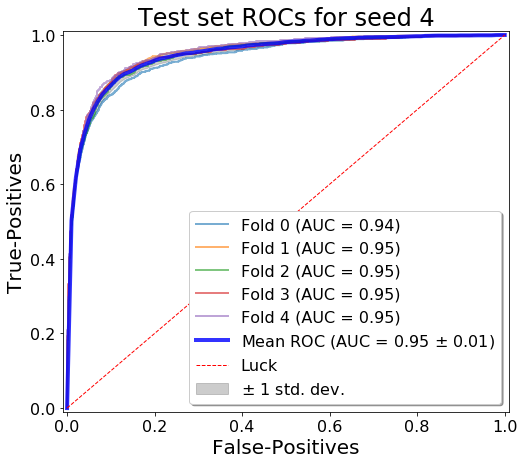

In [14]:
plot_seed_roc(all_preds, 4);

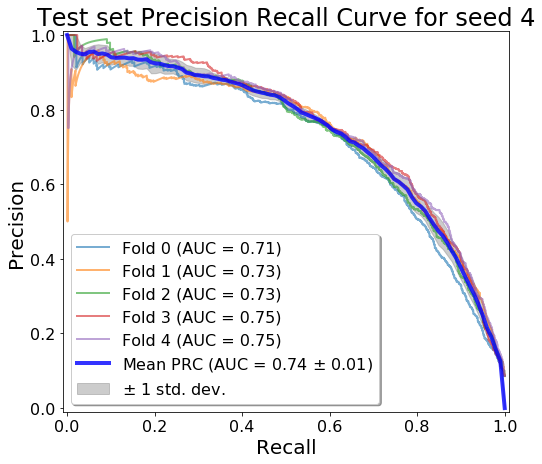

In [15]:
plot_seed_prc(all_preds, 4);

In [16]:
roc_results = []
prc_results = []

for preds in all_preds:

    ys = []
    y_preds = []
    for fold in range(n_folds):
        y_true = preds.query("holdout_fold == @fold")['status'].values
        y_pred = preds.query("holdout_fold == @fold")['probas_{}'.format(fold)].values
    
        ys.append(y_true)
        y_preds.append(y_pred)
    
    roc_results.append(pt.calc_mean_roc_auc(ys, y_preds))
    prc_results.append(pt.calc_mean_prc_auc(ys, y_preds))

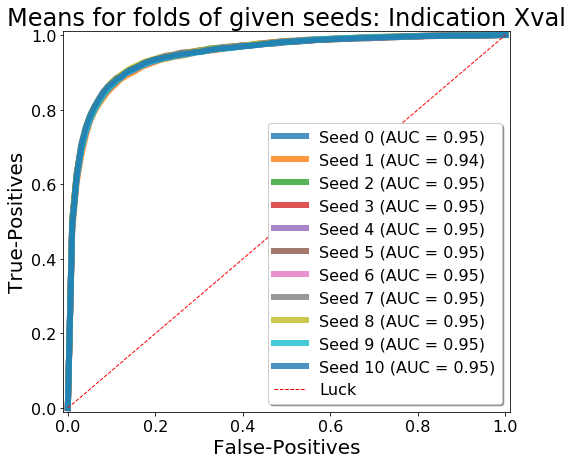

In [17]:
for i, result in enumerate(roc_results):
    pt.graph_mean_roc_from_metrics(*result, label='Seed {}'.format(i), fill_between=False)
pt.graph_roc_boilerplate('Means for folds of given seeds: Indication Xval');

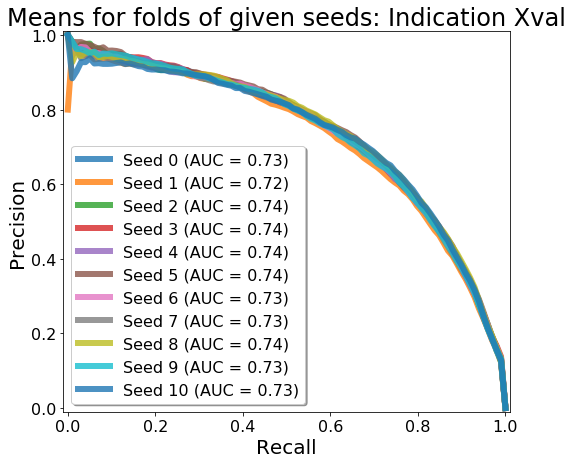

In [18]:
for i, result in enumerate(prc_results):
    pt.graph_mean_prc_from_metrics(*result, label='Seed {}'.format(i), fill_between=False)
pt.graph_prc_boilerplate('Means for folds of given seeds: Indication Xval');

## Comp X-val analysis

Similar ROC analysis for the seeds of the Comp X-val splitting paradigm:

In comp x-val, the True-positive indication list was split into 5 folds of equal numbers of unique compounds.  Holdout postives and negatives for a fold all containted the compounds, so that they were never seen for the training porition.

In [19]:
base_dir_cx = os.path.join(DATA_DIR, 'time_networks-6_metanode/2020/alpha_0.1/10x_pos-neg/0_year_diff/' + \
                        'recall-scoring/2_pmids/dwpc_w_0.6/5_fold_CV/comp_xval')

In [20]:
seeds_cx = sorted([d for d in os.listdir(base_dir_cx) if d.startswith('seed')])

all_preds_cx = []

for seed in seeds_cx:
    load_dir = os.path.join(base_dir_cx, seed)
    all_preds_cx.append(pd.read_csv(os.path.join(load_dir, 'predictions.csv')))

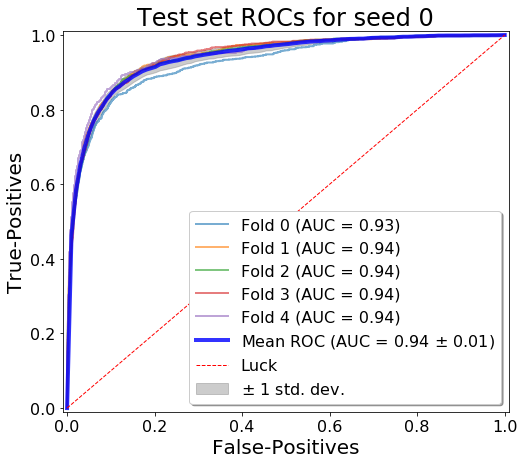

In [21]:
plot_seed_roc(all_preds_cx, 0);

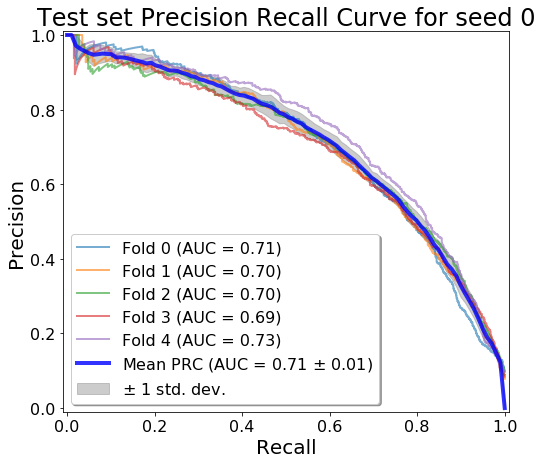

In [22]:
plot_seed_prc(all_preds_cx, 0);

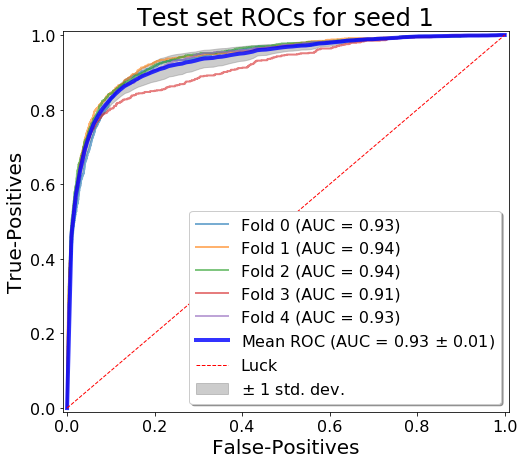

In [23]:
plot_seed_roc(all_preds_cx, 1);

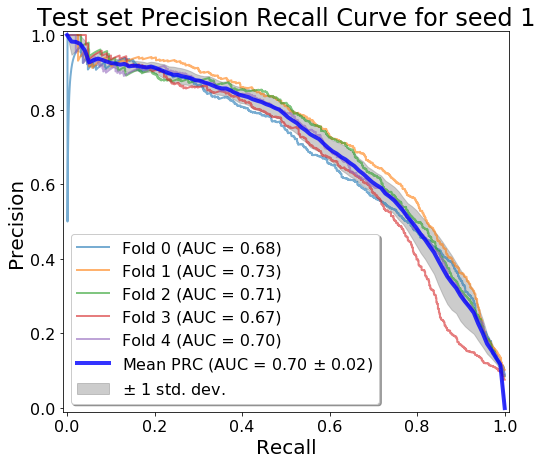

In [24]:
plot_seed_prc(all_preds_cx, 1);

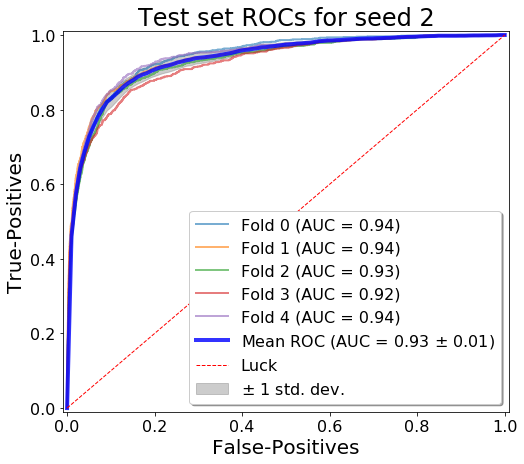

In [25]:
plot_seed_roc(all_preds_cx, 2);

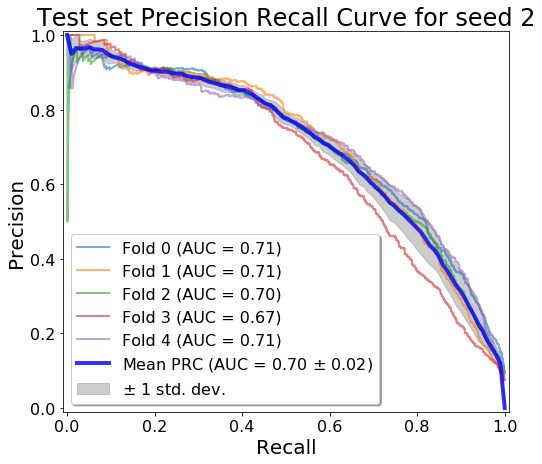

In [26]:
plot_seed_prc(all_preds_cx, 2);

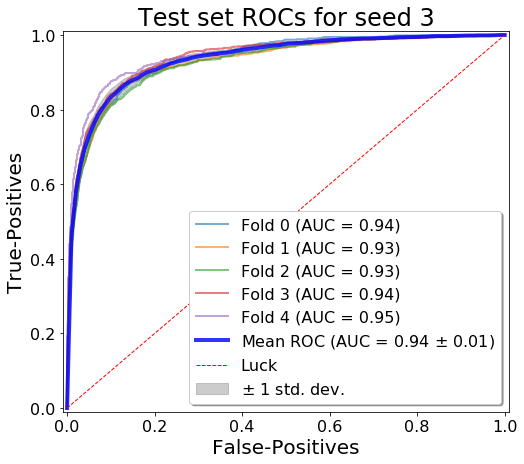

In [27]:
plot_seed_roc(all_preds_cx, 3);

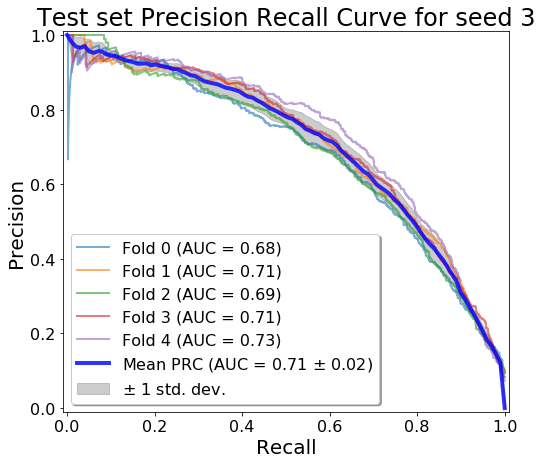

In [28]:
plot_seed_prc(all_preds_cx, 3);

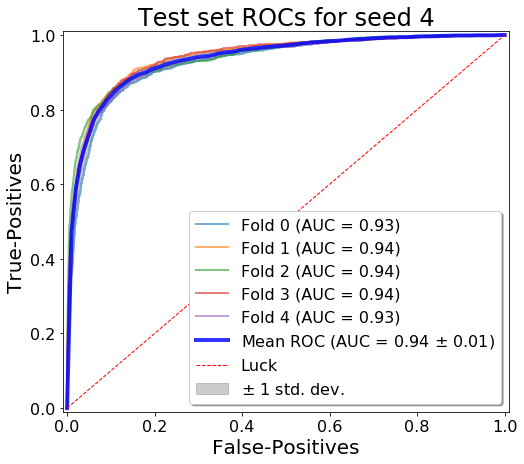

In [29]:
plot_seed_roc(all_preds_cx, 4);

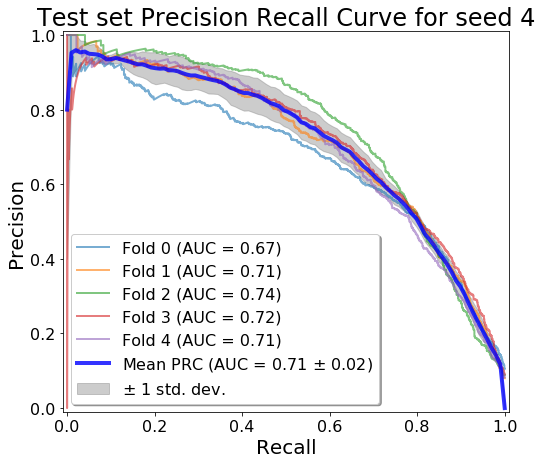

In [30]:
plot_seed_prc(all_preds_cx, 4);

In [31]:
roc_results_cx = []
prc_results_cx = []

for preds in all_preds_cx:

    ys = []
    y_preds = []
    for fold in range(n_folds):
        y_true = preds.query("holdout_fold == @fold")['status'].values
        y_pred = preds.query("holdout_fold == @fold")['probas_{}'.format(fold)].values
    
        ys.append(y_true)
        y_preds.append(y_pred)
    
    roc_results_cx.append(pt.calc_mean_roc_auc(ys, y_preds))
    prc_results_cx.append(pt.calc_mean_prc_auc(ys, y_preds))


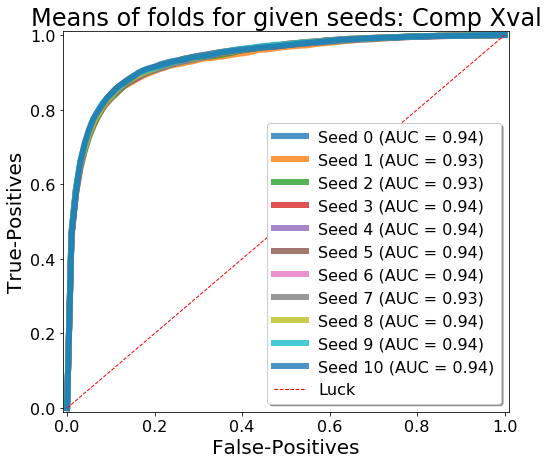

In [32]:
for i, result in enumerate(roc_results_cx):
    pt.graph_mean_roc_from_metrics(*result, label='Seed {}'.format(i), fill_between=False)
pt.graph_roc_boilerplate('Means of folds for given seeds: Comp Xval');

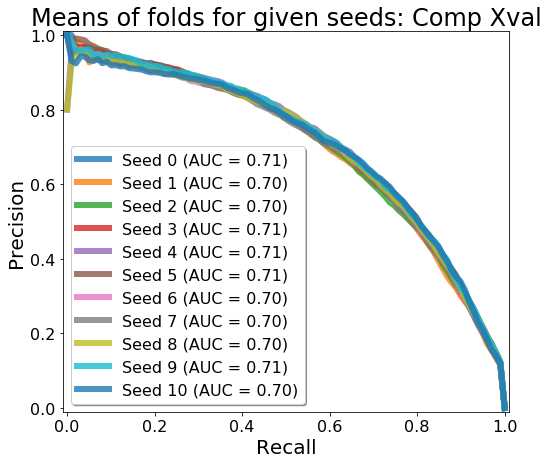

In [33]:
for i, result in enumerate(prc_results_cx):
    pt.graph_mean_prc_from_metrics(*result, label='Seed {}'.format(i), fill_between=False)
pt.graph_prc_boilerplate('Means of folds for given seeds: Comp Xval');

## Individaul CD pair analysis

In [34]:
preds = all_preds[0]
preds.head(2)

,cd_id,cd_name,do_id,do_name,status,approval_year,year_diff,year_cat,holdout_fold,probas_0,...,cd_percentile_0,do_percentile_0,cd_percentile_1,do_percentile_1,cd_percentile_2,do_percentile_2,cd_percentile_3,do_percentile_3,cd_percentile_4,do_percentile_4
0,C010038,azelaic acid,C0001263,Abdominal actinomycosis,0,NaN,NaN,NaN,NaN,0.016196,...,0.393243,0.000753,0.314865,0.000753,0.340541,0.001506,0.266216,0.000753,0.404054,0.000753
1,C033069,methyl salicylate,C0001263,Abdominal actinomycosis,0,NaN,NaN,NaN,NaN,0.018970,...,0.682432,0.009036,0.598649,0.002259,0.401351,0.000753,0.640541,0.001506,0.605405,0.001506


In [35]:
def percentile_to_rank(col, total_elements):
    return np.round(-1*total_elements * col + (total_elements + 1)).astype(int)

In [36]:
for i in range(n_folds):
    preds['do_rank_{}'.format(i)] = percentile_to_rank(preds['do_percentile_{}'.format(i)], preds['cd_id'].nunique())
    preds['cd_rank_{}'.format(i)] = percentile_to_rank(preds['cd_percentile_{}'.format(i)], preds['do_id'].nunique())

In [37]:
cutoffs = [20, 100]
rank_cats = ['Top {}'.format(cutoffs[0]), '{}-{}'.format(cutoffs[0]+1, cutoffs[1]), '> {}'.format(cutoffs[1])]

def get_rank_cat(rank):
    if rank <= cutoffs[0]:
        return rank_cats[0]
    
    elif rank > cutoffs[0] and rank <= cutoffs[1]:
        return rank_cats[1]
    
    else:
        return rank_cats[2]

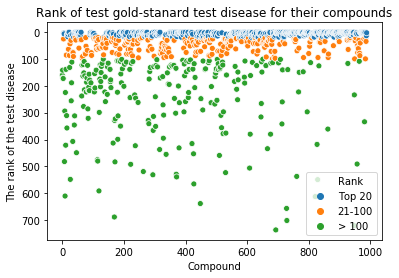

In [38]:
test_fold = 0

curr_fold_test_cd_ranks = preds.query('holdout_fold == @test_fold and status == 1')[['cd_id',
                                'do_id', 'cd_rank_{}'.format(test_fold)]].reset_index(drop=True)

curr_fold_test_cd_ranks['Rank'] = curr_fold_test_cd_ranks['cd_rank_{}'.format(test_fold)].apply(lambda r: get_rank_cat(r))


ax = sns.scatterplot(x='index', y='cd_rank_{}'.format(test_fold), data=curr_fold_test_cd_ranks.reset_index(),
                     hue='Rank', hue_order=rank_cats)

plt.title('Rank of test gold-stanard test disease for their compounds')
plt.xlabel('Compound')
plt.ylabel('The rank of the test disease')
plt.legend(loc='lower right')

ax.invert_yaxis();

In [39]:
n_dis = preds['do_id'].nunique()

/opt/mmayers/software/anaconda3/envs/integrate/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


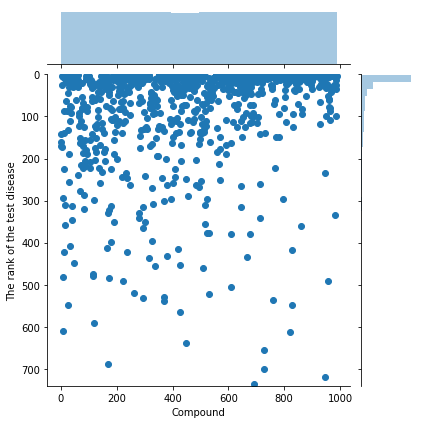

In [40]:
test_fold = 0

curr_fold_test_cd_ranks = preds.query('holdout_fold == @test_fold and status == 1')[['cd_id',
                                'do_id', 'cd_rank_{}'.format(test_fold)]].reset_index(drop=True)

curr_fold_test_cd_ranks['Rank'] = curr_fold_test_cd_ranks['cd_rank_{}'.format(test_fold)].apply(lambda r: get_rank_cat(r))


g = sns.jointplot(x='index', y='cd_rank_{}'.format(test_fold), data=curr_fold_test_cd_ranks.reset_index(),
                  ylim=(n_dis, 0))


#plt.title('Rank of test gold-stanard test disease for their compounds')
g.set_axis_labels('Compound', 'The rank of the test disease');
#plt.legend(loc='lower right');

#ax.invert_yaxis();

/opt/mmayers/software/anaconda3/envs/integrate/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


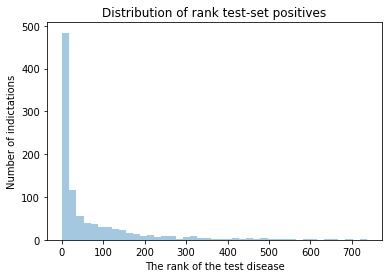

In [41]:
sns.distplot(curr_fold_test_cd_ranks['cd_rank_{}'.format(test_fold)], kde=False)
plt.title('Distribution of rank test-set positives')
plt.xlabel('The rank of the test disease')
plt.ylabel('Number of indictations');

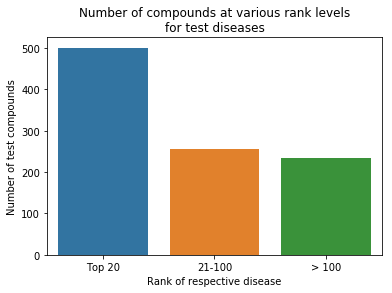

In [42]:
sns.barplot(x='index', y='Rank', data=curr_fold_test_cd_ranks['Rank'].value_counts().reset_index())
plt.title('Number of compounds at various rank levels\nfor test diseases')
plt.xlabel('Rank of respective disease')
plt.ylabel('Number of test compounds');

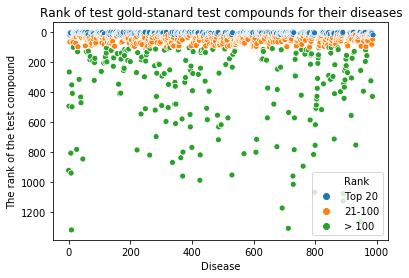

In [43]:
test_fold = 0

curr_fold_test_do_ranks = preds.query('holdout_fold == @test_fold and status == 1')[['do_id',
                                'cd_id', 'do_rank_{}'.format(test_fold)]].reset_index(drop=True)

curr_fold_test_do_ranks['Rank'] = curr_fold_test_do_ranks['do_rank_{}'.format(test_fold)].apply(lambda r: get_rank_cat(r))


ax = sns.scatterplot(x='index', y='do_rank_{}'.format(test_fold), data=curr_fold_test_do_ranks.reset_index(),
                     hue='Rank', hue_order=rank_cats)

plt.title('Rank of test gold-stanard test compounds for their diseases')
plt.xlabel('Disease')
plt.ylabel('The rank of the test compound')
plt.legend(loc='lower right')

ax.invert_yaxis();

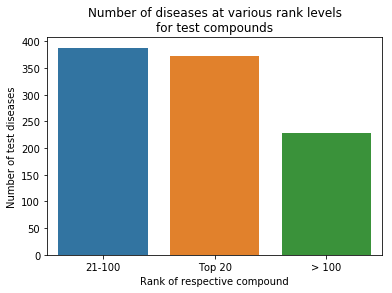

In [44]:
sns.barplot(x='index', y='Rank', data=curr_fold_test_do_ranks['Rank'].value_counts().reset_index())
plt.title('Number of diseases at various rank levels\nfor test compounds')
plt.xlabel('Rank of respective compound')
plt.ylabel('Number of test diseases');

In [45]:
n_comp = preds['cd_id'].nunique()

/opt/mmayers/software/anaconda3/envs/integrate/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


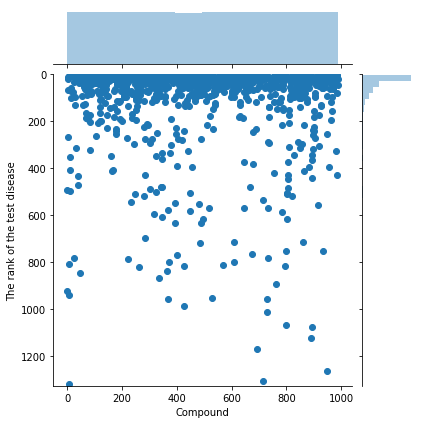

In [46]:
test_fold = 0

curr_fold_test_do_ranks = preds.query('holdout_fold == @test_fold and status == 1')[['cd_id',
                                'do_id', 'do_rank_{}'.format(test_fold)]].reset_index(drop=True)

curr_fold_test_do_ranks['Rank'] = curr_fold_test_do_ranks['do_rank_{}'.format(test_fold)].apply(lambda r: get_rank_cat(r))


g = sns.jointplot(x='index', y='do_rank_{}'.format(test_fold), data=curr_fold_test_do_ranks.reset_index(),
                  ylim=(n_comp, 0))


#plt.title('Rank of test gold-stanard test disease for their compounds')
g.set_axis_labels('Compound', 'The rank of the test disease');
#plt.legend(loc='lower right');

#ax.invert_yaxis();

/opt/mmayers/software/anaconda3/envs/integrate/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


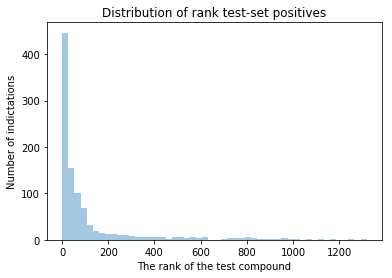

In [47]:
sns.distplot(curr_fold_test_do_ranks['do_rank_{}'.format(test_fold)], kde=False)
plt.title('Distribution of rank test-set positives')
plt.xlabel('The rank of the test compound')
plt.ylabel('Number of indictations');

## Feature Selection Analysis 5-fold, single-seed

In [48]:
coef = pd.read_csv(os.path.join(load_dir, 'model_coefficients.csv'))

In [49]:
coef.head()

,feature,coef_0,zcoef_0,coef_1,zcoef_1,coef_2,zcoef_2,coef_3,zcoef_3,coef_4,zcoef_4
0,intercept,-3.336299,-3.336300,-3.267139,-3.267138,-3.408783,-3.408785,-3.478562,-3.478556,-3.624065,-3.624067
1,degree_CDafA,0.000000,0.000000,0.027372,0.027372,0.020348,0.020348,0.062410,0.062410,0.028819,0.028819
2,degree_CDafPH,0.196193,0.196191,0.136109,0.136107,0.228653,0.228650,0.249219,0.249216,0.273051,0.273048
3,degree_CDagPS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,degree_CDawPS,0.063613,0.063612,0.032292,0.032292,0.063161,0.063161,0.098784,0.098783,-0.000404,-0.000404


In [50]:
cols = [c for c in coef.columns if c.startswith('coef_')]

/opt/mmayers/software/anaconda3/envs/integrate/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


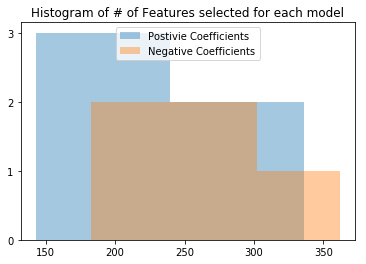

In [51]:
sns.distplot((coef[cols] > 0).sum(), kde=False, label='Postivie Coefficients')
sns.distplot((coef[cols] < 0).sum(), kde=False, label='Negative Coefficients')
plt.title('Histogram of # of Features selected for each model')
plt.yticks([0,1,2,3])
plt.legend(loc=9);

In [52]:
(coef.T != 0.0).sum(axis=1)

feature    1737
coef_0      357
zcoef_0     357
coef_1      326
zcoef_1     326
coef_2      463
zcoef_2     463
coef_3      532
zcoef_3     532
coef_4      698
zcoef_4     698
dtype: int64

In [53]:
pos_counts = (coef[cols] > 0).sum().rename('value').to_frame().reset_index().rename(columns={'index': 'fold'})
pos_counts['Coefficient Sign'] = 'Postivie'

neg_counts = (coef[cols] < 0).sum().rename('value').to_frame().reset_index().rename(columns={'index': 'fold'})
neg_counts['Coefficient Sign'] = 'Negative'


coef_counts = pd.concat([pos_counts, neg_counts])

coef_counts['fold'] = coef_counts['fold'].map(lambda v: v.split('_')[-1]).astype(int)

In [54]:
coef_counts

,fold,value,Coefficient Sign
0,0,155,Postivie
1,1,143,Postivie
2,2,211,Postivie
3,3,256,Postivie
4,4,336,Postivie
0,0,202,Negative
1,1,183,Negative
2,2,252,Negative
3,3,276,Negative
4,4,362,Negative


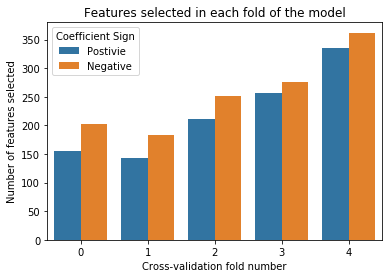

In [55]:
sns.barplot(x='fold', y='value', data=coef_counts, hue='Coefficient Sign')
plt.title('Features selected in each fold of the model')

plt.xlabel('Cross-validation fold number')
plt.ylabel('Number of features selected');

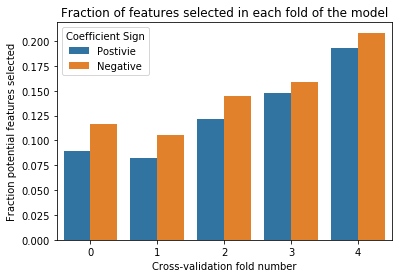

In [56]:
total_feature_number = len(coef)
coef_counts['percent'] = coef_counts['value'] / total_feature_number

sns.barplot(x='fold', y='percent', data=coef_counts, hue='Coefficient Sign')
plt.title('Fraction of features selected in each fold of the model')

plt.xlabel('Cross-validation fold number')
plt.ylabel('Fraction potential features selected');

In [57]:
weighted_coef = (coef.set_index('feature') / coef.set_index('feature').max()).reset_index()
weighted_coef['mean_val'] = weighted_coef[cols].mean(axis=1)
weighted_coef = weighted_coef.sort_values('mean_val', ascending=False).reset_index(drop=True)

weighted_coef.head(2)

,feature,coef_0,zcoef_0,coef_1,zcoef_1,coef_2,zcoef_2,coef_3,zcoef_3,coef_4,zcoef_4,mean_val
0,dwpc_CDtDOawDO,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,dwpc_CDrtCDtDO,0.994839,0.994839,0.99047,0.99047,0.993747,0.993747,0.976588,0.976588,0.873385,0.873385,0.965806


In [58]:
trans_coef = pd.melt(weighted_coef, id_vars=['feature'], value_vars=cols)

In [59]:
top_features = trans_coef['feature'][:10].values

In [60]:
sorted_features = trans_coef['feature'].values

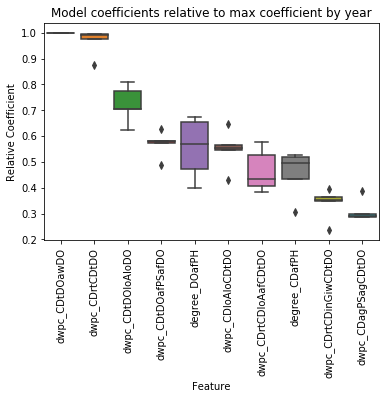

In [61]:
data = trans_coef.query('feature in @top_features')

sns.boxplot(x='feature', y='value', data=data)
plt.xlabel('Feature')
plt.ylabel('Relative Coefficient')
plt.title('Model coefficients relative to max coefficient by year')
plt.xticks(rotation=90);

In [62]:
coef['mean_coef'] = coef[cols].mean(axis=1)
unweight_trans_coef = pd.melt(coef.sort_values('mean_coef', ascending=False), id_vars=['feature'], value_vars=cols)

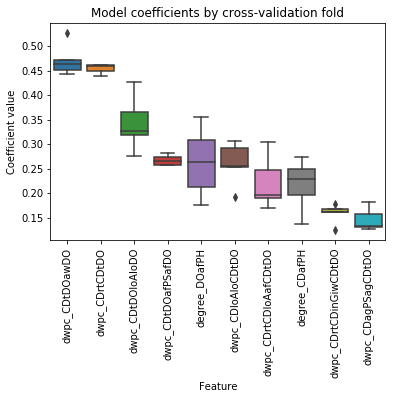

In [63]:
data = unweight_trans_coef.query('feature in @top_features')

sns.boxplot(x='feature', y='value', data=data)
plt.xlabel('Feature')
plt.ylabel('Coefficient value')
plt.title('Model coefficients by cross-validation fold')
plt.xticks(rotation=90);

# Coef analysis across all seeds (Split by Indication)

In [64]:
all_coefs = []

for i, seed in enumerate(seeds):
    
    load_dir = os.path.join(base_dir, seed)
    coefs = pd.read_csv(os.path.join(load_dir, 'model_coefficients.csv'))
    coefs = coefs.set_index('feature')
    cols = [c for c in coefs.columns if c.startswith('coef_')]
    coefs = coefs[cols]
    coefs.columns = [c+'_s{}'.format(i) for c in coefs.columns]
    all_coefs.append(coefs)
    
all_coefs = pd.concat(all_coefs, axis=1, sort=False).reset_index().rename(columns={'index': 'feature'})
all_coefs.head(2)

,feature,coef_0_s0,coef_1_s0,coef_2_s0,coef_3_s0,coef_4_s0,coef_0_s1,coef_1_s1,coef_2_s1,coef_3_s1,...,coef_0_s9,coef_1_s9,coef_2_s9,coef_3_s9,coef_4_s9,coef_0_s10,coef_1_s10,coef_2_s10,coef_3_s10,coef_4_s10
0,intercept,-3.356122,-3.375057,-3.435943,-3.280877,-3.406269,-3.268777,-3.398129,-3.291857,-3.360378,...,-3.435227,-3.491204,-3.472100,-3.305237,-3.321814,-3.518757,-3.270191,-3.406158,-3.457959,-3.540540
1,degree_CDafA,0.002359,0.038715,0.029262,0.009489,0.027409,0.000000,0.007709,0.004794,0.015753,...,0.019969,0.012485,0.018932,0.000000,0.000000,0.071922,0.000000,0.043614,0.045132,0.067668


In [65]:
cols = [c for c in all_coefs.columns if c.startswith('coef_')]

weighted_coef = (all_coefs.set_index('feature') / all_coefs.set_index('feature').max()).reset_index()
weighted_coef['mean_val'] = weighted_coef[cols].mean(axis=1)
weighted_coef = weighted_coef.sort_values('mean_val', ascending=False).reset_index(drop=True)

weighted_coef.head(2)

,feature,coef_0_s0,coef_1_s0,coef_2_s0,coef_3_s0,coef_4_s0,coef_0_s1,coef_1_s1,coef_2_s1,coef_3_s1,...,coef_1_s9,coef_2_s9,coef_3_s9,coef_4_s9,coef_0_s10,coef_1_s10,coef_2_s10,coef_3_s10,coef_4_s10,mean_val
0,dwpc_CDrtCDtDO,0.988183,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.952611,0.997067,0.992732
1,dwpc_CDtDOawDO,1.000000,0.939901,0.965346,0.932624,0.933818,0.84705,0.850453,0.814749,0.798368,...,0.945038,0.928704,0.949602,0.961873,0.985596,0.978003,0.967033,1.000000,1.000000,0.942006


In [66]:
trans_coef = pd.melt(weighted_coef, id_vars=['feature'], value_vars=cols)
top_features = trans_coef['feature'][:10].values
sorted_features = trans_coef['feature'].values

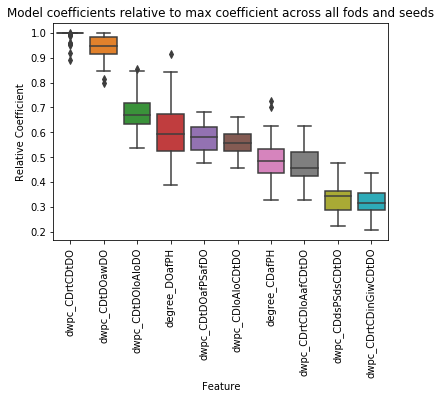

In [67]:
data = trans_coef.query('feature in @top_features')

sns.boxplot(x='feature', y='value', data=data)
plt.xlabel('Feature')
plt.ylabel('Relative Coefficient')
plt.title('Model coefficients relative to max coefficient across all fods and seeds')
plt.xticks(rotation=90);

In [68]:
all_coefs['mean_coef'] = all_coefs[cols].mean(axis=1)
unweight_trans_coef = pd.melt(all_coefs.sort_values('mean_coef', ascending=False), 
                                 id_vars=['feature'], value_vars=cols)

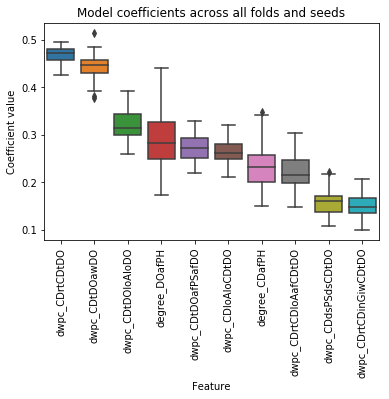

In [69]:
data = unweight_trans_coef.query('feature in @top_features')

sns.boxplot(x='feature', y='value', data=data)
plt.xlabel('Feature')
plt.ylabel('Coefficient value')
plt.title('Model coefficients across all folds and seeds')
plt.xticks(rotation=90);

In [70]:
pos_counts = (all_coefs[cols] > 0).sum().rename('value').to_frame().reset_index().rename(columns={'index': 'fold'})
pos_counts['Coefficient Sign'] = 'Postivie'

neg_counts = (all_coefs[cols] < 0).sum().rename('value').to_frame().reset_index().rename(columns={'index': 'fold'})
neg_counts['Coefficient Sign'] = 'Negative'


coef_counts = pd.concat([pos_counts, neg_counts])

coef_counts['seed'] = coef_counts['fold'].map(lambda v: v.split('_')[-1][1:]).astype(int)
coef_counts['fold'] = coef_counts['fold'].map(lambda v: v.split('_')[1]).astype(int)

coef_counts['fold_seed'] = coef_counts['fold'].astype(str) + '-' + coef_counts['seed'].astype(str)

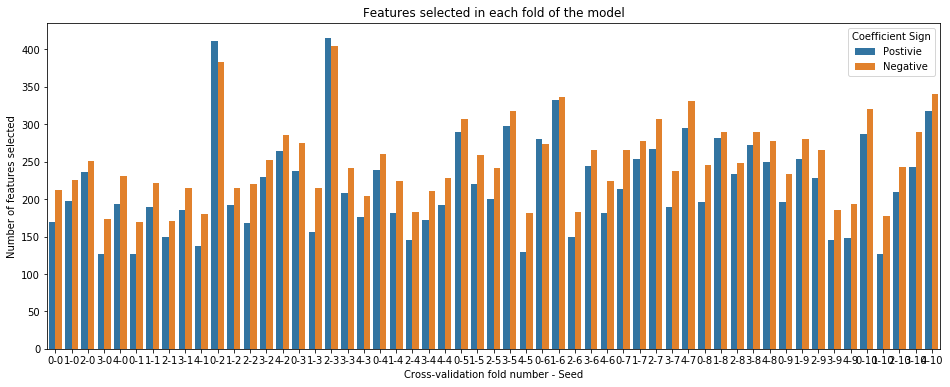

In [71]:
fig = plt.figure()
fig.set_size_inches((16, 6))

sns.barplot(x='fold_seed', y='value', data=coef_counts, hue='Coefficient Sign')


plt.title('Features selected in each fold of the model')

plt.xlabel('Cross-validation fold number - Seed')
plt.ylabel('Number of features selected');

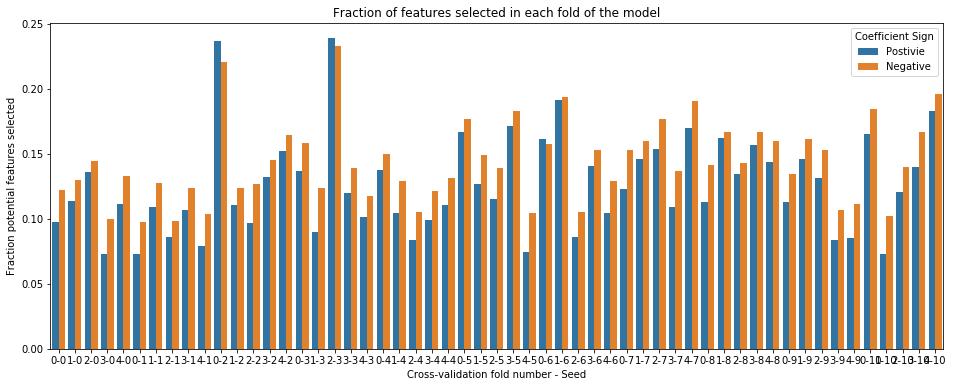

In [72]:
fig = plt.figure()
fig.set_size_inches((16, 6))

total_feature_number = len(all_coefs)
coef_counts['percent'] = coef_counts['value'] / total_feature_number

sns.barplot(x='fold_seed', y='percent', data=coef_counts, hue='Coefficient Sign')
plt.title('Fraction of features selected in each fold of the model')

plt.xlabel('Cross-validation fold number - Seed')
plt.ylabel('Fraction potential features selected');

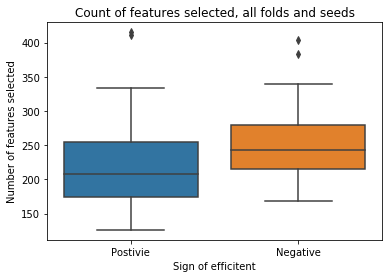

In [73]:
sns.boxplot(x='Coefficient Sign', y='value', data=coef_counts)
#sns.swarmplot(x='Coefficient Sign', y='value', data=coef_counts)
plt.title('Count of features selected, all folds and seeds')

plt.xlabel('Sign of efficitent')
plt.ylabel('Number of features selected');

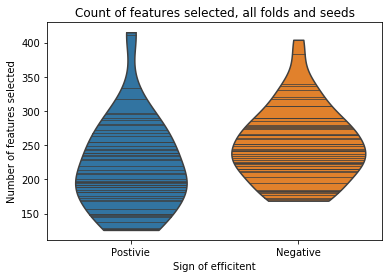

In [74]:
sns.violinplot(x='Coefficient Sign', y='value', data=coef_counts, inner='stick', cut=0)
plt.title('Count of features selected, all folds and seeds')

plt.xlabel('Sign of efficitent')
plt.ylabel('Number of features selected');

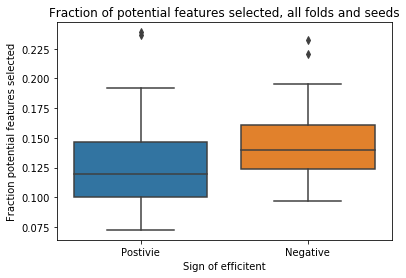

In [75]:
sns.boxplot(x='Coefficient Sign', y='percent', data=coef_counts)
#sns.swarmplot(x='Coefficient Sign', y='percent', data=coef_counts)
plt.title('Fraction of potential features selected, all folds and seeds')

plt.xlabel('Sign of efficitent')
plt.ylabel('Fraction potential features selected');

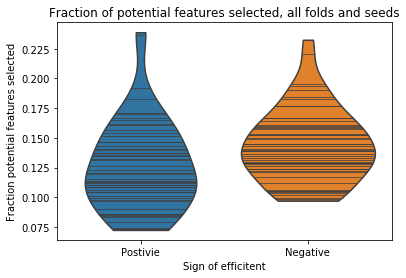

In [76]:
sns.violinplot(x='Coefficient Sign', y='percent', data=coef_counts, inner='stick', cut=0)
plt.title('Fraction of potential features selected, all folds and seeds')

plt.xlabel('Sign of efficitent')
plt.ylabel('Fraction potential features selected');

# Coef analysis across all seeds (Comp Xval)

In [77]:
all_coefs_cx = []

for i, seed in enumerate(seeds_cx):
    
    load_dir = os.path.join(base_dir_cx, seed)
    coefs = pd.read_csv(os.path.join(load_dir, 'model_coefficients.csv'))
    coefs = coefs.set_index('feature')
    cols = [c for c in coefs.columns if c.startswith('coef_')]
    coefs = coefs[cols]
    coefs.columns = [c+'_s{}'.format(i) for c in coefs.columns]
    all_coefs_cx.append(coefs)
    
all_coefs_cx = pd.concat(all_coefs_cx, axis=1, sort=False).reset_index().rename(columns={'index': 'feature'})
all_coefs_cx.head(2)

,feature,coef_0_s0,coef_1_s0,coef_2_s0,coef_3_s0,coef_4_s0,coef_0_s1,coef_1_s1,coef_2_s1,coef_3_s1,...,coef_0_s9,coef_1_s9,coef_2_s9,coef_3_s9,coef_4_s9,coef_0_s10,coef_1_s10,coef_2_s10,coef_3_s10,coef_4_s10
0,intercept,-3.582894,-3.337567,-3.390459,-3.275339,-3.381804,-3.370422,-3.278355,-3.243096,-3.160656,...,-3.619089,-3.334362,-3.31572,-3.336397,-3.462633,-3.336299,-3.267139,-3.408783,-3.478562,-3.624065
1,degree_CDafA,0.000000,0.051229,0.000000,0.000000,0.053209,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.030653,0.066537,0.000000,0.027372,0.020348,0.062410,0.028819


In [78]:
cols = [c for c in all_coefs_cx.columns if c.startswith('coef_')]

weighted_coef_cx = (all_coefs_cx.set_index('feature') / all_coefs_cx.set_index('feature').max()).reset_index()
weighted_coef_cx['mean_val'] = weighted_coef_cx[cols].mean(axis=1)
weighted_coef_cx = weighted_coef_cx.sort_values('mean_val', ascending=False).reset_index(drop=True)

weighted_coef_cx.head(2)

,feature,coef_0_s0,coef_1_s0,coef_2_s0,coef_3_s0,coef_4_s0,coef_0_s1,coef_1_s1,coef_2_s1,coef_3_s1,...,coef_1_s9,coef_2_s9,coef_3_s9,coef_4_s9,coef_0_s10,coef_1_s10,coef_2_s10,coef_3_s10,coef_4_s10,mean_val
0,dwpc_CDrtCDtDO,0.924724,0.979942,1.000000,0.999481,0.996095,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.991834,1.000000,0.994839,0.99047,0.993747,0.976588,0.873385,0.978994
1,dwpc_CDtDOawDO,1.000000,1.000000,0.972276,1.000000,1.000000,0.966862,0.909283,0.899561,0.780158,...,0.994044,0.975184,1.000000,0.939012,1.000000,1.00000,1.000000,1.000000,1.000000,0.968872


In [79]:
trans_coef_cx = pd.melt(weighted_coef_cx, id_vars=['feature'], value_vars=cols)
top_features_cx = trans_coef_cx['feature'][:10].values
sorted_features_cx = trans_coef_cx['feature'].values

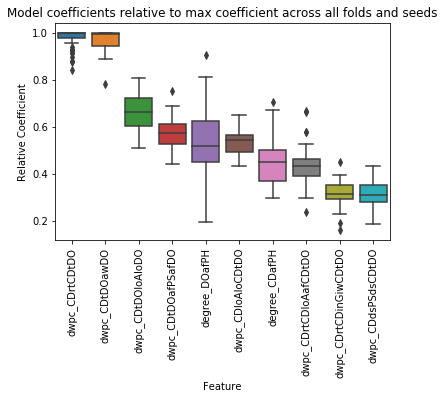

In [80]:
data = trans_coef_cx.query('feature in @top_features_cx')

sns.boxplot(x='feature', y='value', data=data)
plt.xlabel('Feature')
plt.ylabel('Relative Coefficient')
plt.title('Model coefficients relative to max coefficient across all folds and seeds')
plt.xticks(rotation=90);

In [81]:
all_coefs_cx['mean_coef'] = all_coefs_cx[cols].mean(axis=1)
unweight_trans_coef_cx = pd.melt(all_coefs_cx.sort_values('mean_coef', ascending=False), 
                                 id_vars=['feature'], value_vars=cols)

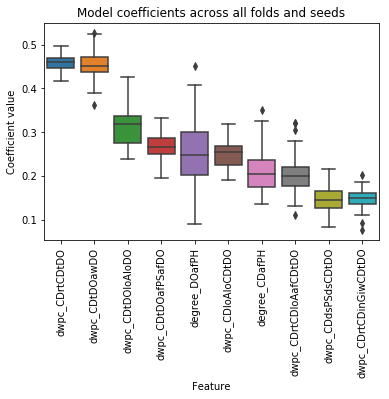

In [82]:
data = unweight_trans_coef_cx.query('feature in @top_features_cx')

sns.boxplot(x='feature', y='value', data=data)
plt.xlabel('Feature')
plt.ylabel('Coefficient value')
plt.title('Model coefficients across all folds and seeds')
plt.xticks(rotation=90);

In [83]:
pos_counts_cx = (all_coefs_cx[cols] > 0).sum().rename('value').to_frame().reset_index().rename(columns={'index': 'fold'})
pos_counts_cx['Coefficient Sign'] = 'Postivie'

neg_counts_cx = (all_coefs_cx[cols] < 0).sum().rename('value').to_frame().reset_index().rename(columns={'index': 'fold'})
neg_counts_cx['Coefficient Sign'] = 'Negative'


coef_counts_cx = pd.concat([pos_counts_cx, neg_counts_cx])

coef_counts_cx['seed'] = coef_counts_cx['fold'].map(lambda v: v.split('_')[-1][1:]).astype(int)
coef_counts_cx['fold'] = coef_counts_cx['fold'].map(lambda v: v.split('_')[1]).astype(int)

coef_counts_cx['fold_seed'] = coef_counts_cx['fold'].astype(str) + '-' + coef_counts_cx['seed'].astype(str)

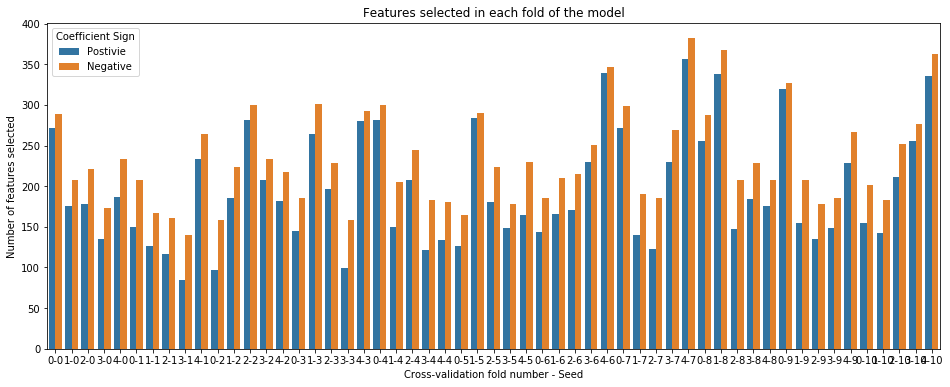

In [84]:
fig = plt.figure()
fig.set_size_inches((16, 6))

sns.barplot(x='fold_seed', y='value', data=coef_counts_cx, hue='Coefficient Sign')

plt.title('Features selected in each fold of the model')

plt.xlabel('Cross-validation fold number - Seed')
plt.ylabel('Number of features selected');

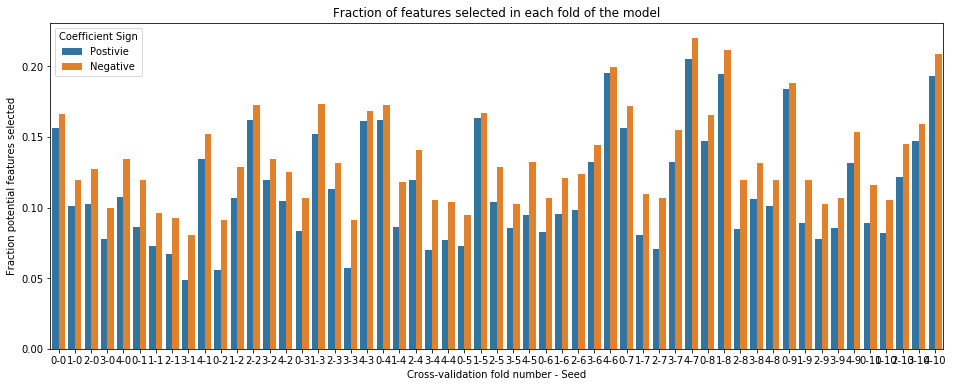

In [85]:
fig = plt.figure()
fig.set_size_inches((16, 6))

total_feature_number_cx = len(all_coefs_cx)
coef_counts_cx['percent'] = coef_counts_cx['value'] / total_feature_number_cx

sns.barplot(x='fold_seed', y='percent', data=coef_counts_cx, hue='Coefficient Sign')
plt.title('Fraction of features selected in each fold of the model')

plt.xlabel('Cross-validation fold number - Seed')
plt.ylabel('Fraction potential features selected');

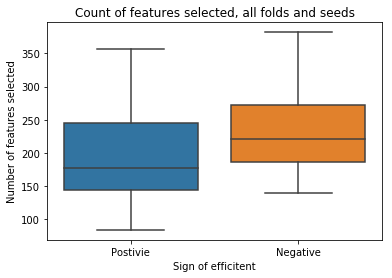

In [86]:
sns.boxplot(x='Coefficient Sign', y='value', data=coef_counts_cx)
#sns.swarmplot(x='Coefficient Sign', y='value', data=coef_counts)
plt.title('Count of features selected, all folds and seeds')

plt.xlabel('Sign of efficitent')
plt.ylabel('Number of features selected');

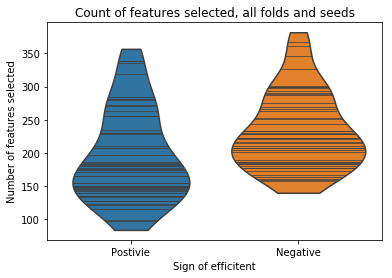

In [87]:
sns.violinplot(x='Coefficient Sign', y='value', data=coef_counts_cx, inner='stick', cut=0)
plt.title('Count of features selected, all folds and seeds')

plt.xlabel('Sign of efficitent')
plt.ylabel('Number of features selected');

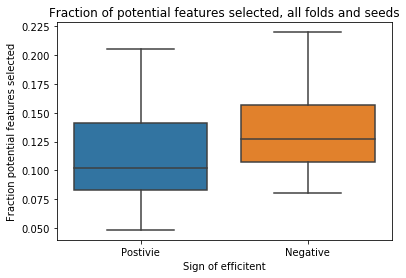

In [88]:
sns.boxplot(x='Coefficient Sign', y='percent', data=coef_counts_cx)
#sns.swarmplot(x='Coefficient Sign', y='value', data=coef_counts)
plt.title('Fraction of potential features selected, all folds and seeds')

plt.xlabel('Sign of efficitent')
plt.ylabel('Fraction potential features selected');

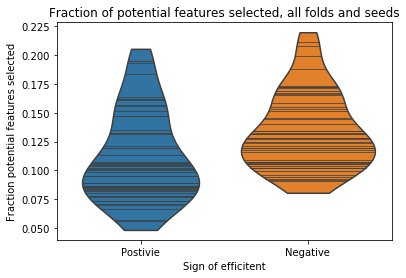

In [89]:
sns.violinplot(x='Coefficient Sign', y='percent', data=coef_counts_cx, inner='stick', cut=0)
plt.title('Fraction of potential features selected, all folds and seeds')

plt.xlabel('Sign of efficitent')
plt.ylabel('Fraction potential features selected');